<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/pyhton%202023/Caso_09_Prueba_de_independencia_de_datos_basado_en_prueba_de_Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Realizar prueba de independencia de datos basada en la prueba de *Póker*.

# Descripción

* Se cargan librerías
* Se crean funciones
* Se crean los datos
* Se construye tabla de frecuencias con frecuencia oservada, $O_i$, frecuencia esperada $E_i$ y estadístico $C$ chi cuadrada para obtener la sumatoria de $C$.
* Se determina el valor de prueba chi cuadrada
* Se contrasta el valor calculado de C contra el valor de prueba
* Se acepta o rechaza Ho
* Se concluye y se visualzia la distribución chi cuadrada con la prueba de *póker*.



# Fundamento teórico

## ¿Qué significa prueba estadística de independencia datos?

La independencia de los datos es un concepto fundamental en estadísticas y análisis de datos que se refiere a la falta de relación o dependencia entre las observaciones o eventos.

Existen diversar puebas estadísticas como las pruebas de póker, prueba de corrida arriba abajo, prueba de series, prueba de huecos entre otros que se utilizan para identificar independencia o no de los datos y que ayudan a la interpretación de los resultados con precisión.

La independencia de datos es un concepto estadístico y puede depender del contexto de los datos, de la muestra y de los análisis específicos.

Datos Independientes: Cuando los datos son independientes, significa que la ocurrencia o valor de un evento o punto no está influenciado por los otros eventos o puntos en el conjunto de datos. En otras palabras, no hay relación causal o dependencia entre las observaciones. Cada observación se considera un evento aislado y no afecta ni está influenciada por las demás.

Datos No Independientes: Si los datos no son independientes, implica que existe algún tipo de relación o dependencia entre las observaciones. Esto puede manifestarse en diferentes formas, tal vez detectando algún patrón que indica que las observaciones no son eventos aislados y se ven afectados por otros.

En el contexto de las pruebas de póker, la independencia es fundamental para evaluar si las manos son aleatorias o si muestran patrones específicos de dependencia. Por ejemplo, en una mano de póker, se asume que las cartas se barajan de manera aleatoria y que no hay dependencia entre las cartas que se reparten.

En resumen, la independencia de los datos es un supuesto importante en muchas pruebas estadísticas, ya que permite realizar inferencias válidas sobre las distribuciones y patrones observados.

Cuando se sospecha que los datos no son independientes, es necesario considerar otros métodos y análisis específicos.

Las pruebas de independencia de datos se contrasatan contra el valor estadístico de prueba de chi cuadrada cola a la derecha.

## Mecanismo de la prueba de *Póker*

### Paso 1: Definir Hipótesis nula y alternaiva

Es la misma para todas las pruebas de hipótesis de independencia de los datos.
$$
H_0: \text{Los datos SI son independientes}
$$

$$
H_a: \text{Los datos NO son independientes}
$$


Se define el valor de alfa para utilizarlo en el contraste.
$$
confianza = 0.95
$$

$$
significancia_alfa \alpha = 1 - confianza = 0.05
$$

La prueba es cola a la derecha usando distribución chi cuadrada.



### Paso 2: Identificar las probabilidades predefinidas para manos de poker:

* Para tres decimales:
  * NADA 0.7200, PAR 0.2700, TERCIA	0.0100

* Para cuatro decimales:NADA 0.5040, PAR 0.4320,
  * DOS PARES 0.0270, TERCIA 0.0360, POKER 0.0010

* Para cinco decimales: NADA 0.3024, PAR 0.5040,
  * DOS PARES 0.1080, TERCIA 0.0720, TERCIA PAR 0.0090, POKER 0.0045, QUINTILLA 0.0001.

Estas probabilidades se utilizan para construir la tabla de frecuencias en la prueba de *Póker*.

### Paso 3: Calcular frecuencia observada Oi

Construir tabla de frecuencia:

Para cada número aleatorio generado verificar (imaginando que es una mano de poker) si es
pachuca o nada, un par, dos pares, tercia, tercia y par, poker o quintilla; tomando los primeros cinco (cuatro o tres) dígitos a la derecha del punto decimal.

Por ejemplo, 0.03408 es un par, 0.44343 es un full, 0.00321 dos pares, entre otros.

Con esos resultados se enriquece la tabla de frecuencias de estos eventos. La frecuencia observada de cada uno de los eventos se conoce como $O_i$.

### Paso 4: Calcular la frecuencia esperada Ei

Se calcula $FE_i$ multiplicando la probabilidad de cada evento por el número de números aleatorios generados.

### Calcular el estadístico C Chi cuadada

El estadístico C es el mismo estadistico que la suma de chi cuadrada en la tabla de frecuencia construída.

$$
C = \chi^{2}_{o} = \frac{(Ei - Oi)^2}{Ei}
$$


### Constrastar el estadístico C contra el valor de prueba


Si el valor de C es menor o igual al estadístico de tablas $\chi^{2}$ con $gl =6$ grados de libertad, entonces se acepta que los datos son estadísticamente independientes

### Aceptar o rechazar Ho

Dependiendo del contraste

### Visualizar la prueba de *póker*

Construir la curva chi cuadrada con datos simulando valores para observar el contraste del valor del estadístico calculado C (chi cuadrada) contra el valor de prueba chi cuadrada.



La funcion en Python que devuelve el estadístico de prueba es chi2.ppf(1 - alfa_significancia, df=grados de libertdad)


# Desarrollo



## Cargar librerías



In [153]:
# Cargar librerías
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [154]:
# Funciones

# Función que devuelve las frecuencias preestablecidas de acuerdo al número de dígitos
def f_frecuencias_prob_poker(no_digitos):
  if no_digitos == 5:
    return [0.3024, 0.5040, 0.1080, 0.0720, 0.0090, 0.0045, 0.0001]
  if no_digitos == 4:
    return [0.5040, 0.4320, 0.0270, 0.0360, 0.0010]
  if no_digitos == 3:
    return [0.7200, 0.2700, 0.0100]

# Función que devuelve el tipo de mano de póker
def c
    # Convierte el número a una cadena y quita el punto decimal
    numero_str = str(numero).replace(".", "").lstrip("0")

    # Cuenta la frecuencia de cada dígito en la cadena
    digit_count = {}
    for d in numero_str:
        if d in digit_count:
            digit_count[d] += 1
        else:
            digit_count[d] = 1
    # print (digit_count)
    # Obtiene los valores de frecuencia como una lista
    frequencies = list(digit_count.values())

    if 5 in frequencies:
        return "7-Quintilla"
    elif 4 in frequencies:
        return "6-Poker"
    elif 3 in frequencies and 2 in frequencies:
        return "5-Full"
    elif 3 in frequencies:
        return "4-Tercia"
    elif frequencies.count(2) == 2:
        return "3-Dos Pares"
    elif 2 in frequencies:
        return "2-Un Par"
    else:
        return "1-Nada"

# Ejemplo de uso:
# numero = 0.86322
# mano = f_mano_poker(numero)
# print("Tipo de poker:", mano)

# Función que devuelve las frecuencias según el tipo de mano de cada número de la serie de datos
# La función considra el la cantidad de dígitos
def f_frecuencias_manos_poker(numeros, no_digitos):
  manos = []
  for n in numeros:
    manos.append(f_mano_poker(n))

  # construir tabla de frecuencias
  from collections import Counter

  # Contar la frecuencia de cada tipo de mano
  frecuencia = Counter(manos)

  # Mostrar los resultados
  #tipos = Null   # tipos de manos que salieron de los datos
  #for tipo, f in frecuencia.items():
  #  print(f'Tipo: {tipo}, Frecuencia: {f}')

  frecuencia = Counter(manos)

  # Crear un DataFrame
  tabla = pd.DataFrame(list(frecuencia.items()), columns=['Tipo de Mano', 'Frecuencia Oi'])

  tabla = tabla.sort_values('Tipo de Mano')
  tabla = tabla.reset_index(drop=True) #restablece index

  # Dependiendo del número de dígitos se devuelven las probabilidades
  probs = []

  # Dependiendo hasta cuando hay mano
  cuantas_manos_hay = len(tabla)
  # print ("Cuantas manos hay en realidad?: ", cuantas_manos_hay)

  if no_digitos == 5:
    probs = f_frecuencias_prob_poker(no_digitos)
    probs = probs[:cuantas_manos_hay] # Se definen las probabilidades dependiendo de manos que hay
  if no_digitos == 4:
    probs = f_frecuencias_prob_poker(no_digitos)
    probs = probs[:cuantas_manos_hay] # Se definen las probabilidades dependiendo de manos que hay
  if no_digitos == 3:
    probs = f_frecuencias_prob_poker(no_digitos)
    probs = probs[:cuantas_manos_hay] # Se definen las probabilidades dependiendo de manos que hay

  # Completando la construcción de la tabla
  n = sum(tabla['Frecuencia Oi'])
  tabla['probs'] = probs
  tabla['Frecuencia Ei'] = n * tabla['probs']
  tabla['C Chi_cuad'] = (tabla['Frecuencia Ei'] - tabla['Frecuencia Oi']) ** 2 / tabla['Frecuencia Ei']

  suma_chi = sum(tabla['C Chi_cuad'])

  # Devolver los valores
  return(tabla, suma_chi)

def f_contraste(suma_chi_cuad, alfa, tabla):
  # Calcular el etadístico de prueba de chi cuadrada
  #confianza = 0.95
  alfa_significancia = alfa

  # Dependiendo del número de intevalos, solo las manos que salieron
  gl = intervalos = len(tabla) - 1 # Para el valor de grados de libertad
  valor_prueba_chi = chi2.ppf(1 - alfa_significancia, df=gl)

  # Realizar el contraste
  H0 = "Los datos son independientes"
  Ha = "Los datos no son independientes"

  if suma_chi_cuad < valor_prueba_chi:
    decision = f"Se acepta H0. {H0}"
  else:
    decision = f"Se rechaza H0 y se acepta Ha. {Ha}"

  # print(decision)
  return decision, valor_prueba_chi, gl

def f_visualizar_chi_prueba_independencia (datos, suma_chi_cuad, valor_prueba_chi, gl, alfa):
  x = np.linspace(np.min(datos), np.max(datos) * 10, 1000)
  pdf = chi2.pdf(x, df = gl)
  # alfa = 0.05

  # Visualizar
  plt.figure(figsize=(10, 6))
  plt.plot(x, pdf, label=f'Chi-cuadrado ({gl} grados de libertad)')
  plt.axvline(x = suma_chi_cuad, color='green', linestyle='--', label=f'Suma Chi cuadrada calculada  = {suma_chi_cuad}')
  plt.axvline(x = valor_prueba_chi, color='red', linestyle='--', label=f'Estadístico Chi-cuadrado = {valor_prueba_chi}')

  # Agregar un sombreado en el área de rechazo
  x_rechazo = np.linspace(chi2.ppf(1 - alfa, df=gl), 30, 1000)
  plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, df=gl), color='red', alpha=0.2, label=f'Área de Rechazo (alfa = {alfa})')

  # Etiquetas y leyenda
  plt.xlabel('Valor de Chi-cuadrado')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend()

  # Mostrar el resultado en el gráfico
  plt.annotate(decision, xy=(1, 0.1), fontsize=12, color='blue')
  plt.title('Distribución Chi-cuadrado y Resultado de Prueba')

  # Mostrar el gráfico
  plt.show()




In [140]:
datos = [0.72484, 0.48999, 0.50502, 0.39528, 0.36782, 0.90234,
         0.71890, 0.61234, 0.86322, 0.94134, 0.99872, 0.27657,
         0.34565, 0.02345, 0.67347, 0.10987, 0.25678, 0.25593,
         0.82345, 0.12387, 0.05389, 0.82474, 0.59289, 0.36782,
         0.03991, 0.10461, 0.93716, 0.16894, 0.98953, 0.73231]

print(datos)

no_digitos = 5  #5  # Para saber cuales probabilidades utilizar mas adelante
print ("Número de dígits de los números (5, 4, 3). Por default 5: ", no_digitos)

[0.72484, 0.48999, 0.50502, 0.39528, 0.36782, 0.90234, 0.7189, 0.61234, 0.86322, 0.94134, 0.99872, 0.27657, 0.34565, 0.02345, 0.67347, 0.10987, 0.25678, 0.25593, 0.82345, 0.12387, 0.05389, 0.82474, 0.59289, 0.36782, 0.03991, 0.10461, 0.93716, 0.16894, 0.98953, 0.73231]
Número de dígits de los números (5, 4, 3). Por default 5:  5


## Determinar las manos de poker

Utilizando la función previamente codificada para determinar las frecuencias de acuerdo a la mano de poker.



In [144]:
tabla, suma_chi = f_frecuencias_manos_poker(datos, no_digitos)
# print(manos)
print(tabla)
print ("Suma calculada de Chi cuadrada: ", suma_chi)



  Tipo de Mano  Frecuencia Oi   probs  Frecuencia Ei  C Chi_cuad
0       1-Nada             14  0.3024          9.072    2.676938
1     2-Un Par             14  0.5040         15.120    0.082963
2  3-Dos Pares              1  0.1080          3.240    1.548642
3     4-Tercia              1  0.0720          2.160    0.622963
Suma calculada de Chi cuadrada:  4.931506172839507


## Contrastar chi cuadrada

Se contrasta el valor de chi cuadrada calculada $C$ contra el valor de prueba


valor de prueba chi: 7.814727903251179
Se acepta H0. Los datos son independientes


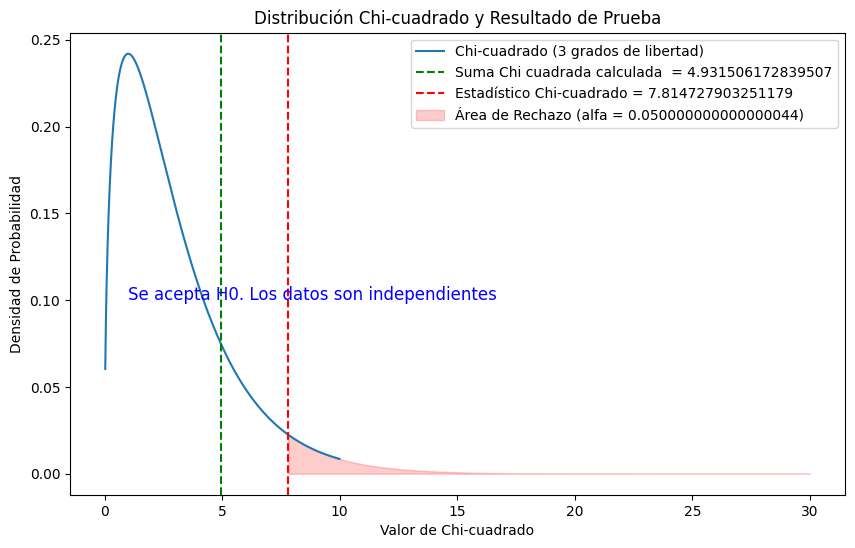

In [147]:
# El contraste
confianza = 0.95
alfa = 1 - confianza

decision, valor_prueba_chi, gl = f_contraste(suma_chi, alfa, tabla)

print("valor de prueba chi:", valor_prueba_chi)
print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi, valor_prueba_chi, gl, alfa)


## Otros datos


[0.364, 0.044, 0.829, 0.914, 0.581, 0.75, 0.813, 0.197, 0.392, 0.131, 0.27, 0.108, 0.934, 0.396, 0.707, 0.039, 0.948, 0.027, 0.111, 0.882, 0.278, 0.14, 0.135, 0.669, 0.083]
Número de dígits de los números (5, 4, 3). Por default 5:  3
  Tipo de Mano  Frecuencia Oi  probs  Frecuencia Ei  C Chi_cuad
0       1-Nada             19   0.72          18.00    0.055556
1     2-Un Par              5   0.27           6.75    0.453704
2     4-Tercia              1   0.01           0.25    2.250000
Suma calculada de Chi cuadrada:  2.7592592592592595
valor de prueba chi: 5.991464547107979
Se acepta H0. Los datos son independientes


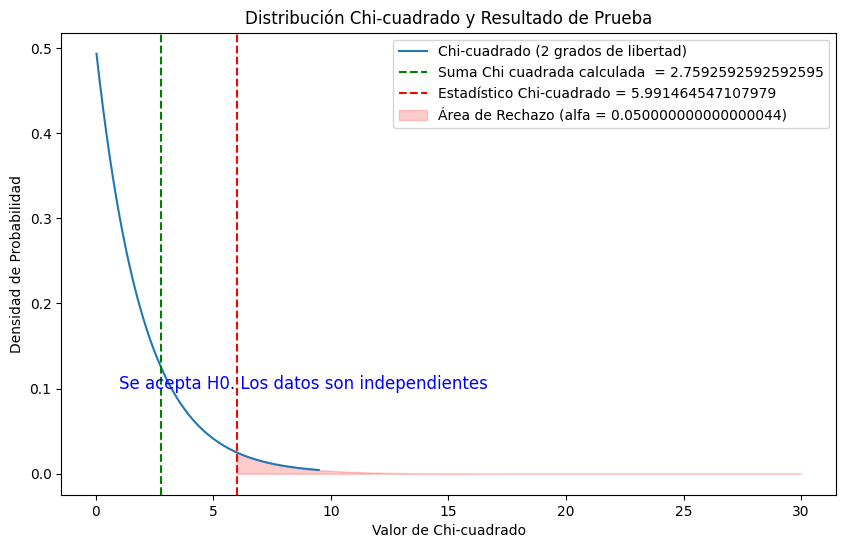

In [152]:
datos = [0.364, 0.044, 0.829, 0.914, 0.581,
         0.75, 0.813, 0.197, 0.392, 0.131,
         0.27, 0.108, 0.934, 0.396, 0.707,
         0.039, 0.948, 0.027, 0.111, 0.882,
         0.278, 0.14, 0.135, 0.669, 0.083]

print (datos)
no_digitos = 3  #5  # Para saber cuales probabilidades utilizar mas adelante
print ("Número de dígits de los números (5, 4, 3). Por default 5: ", no_digitos)

# LA tabla:
tabla, suma_chi = f_frecuencias_manos_poker(datos, no_digitos)
# print(manos)
print(tabla)
print ("Suma calculada de Chi cuadrada: ", suma_chi)

# El contraste
confianza = 0.95
alfa = 1 - confianza

decision, valor_prueba_chi, gl = f_contraste(suma_chi, alfa, tabla)

print("valor de prueba chi:", valor_prueba_chi)
print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi, valor_prueba_chi, gl, alfa)




Número de dígits de los números (5, 4, 3). Por default 5:  5
  Tipo de Mano  Frecuencia Oi   probs  Frecuencia Ei  C Chi_cuad
0       1-Nada              2  0.3024         4.5360    1.417834
1     2-Un Par              4  0.5040         7.5600    1.676402
2  3-Dos Pares              2  0.1080         1.6200    0.089136
3     4-Tercia              4  0.0720         1.0800    7.894815
4       5-Full              2  0.0090         0.1350   25.764630
5      6-Poker              1  0.0045         0.0675   12.882315
Suma calculada de Chi cuadrada:  49.72513139329807
valor de prueba chi: 11.070497693516351
Se rechaza H0 y se acepta Ha. Los datos no son independientes


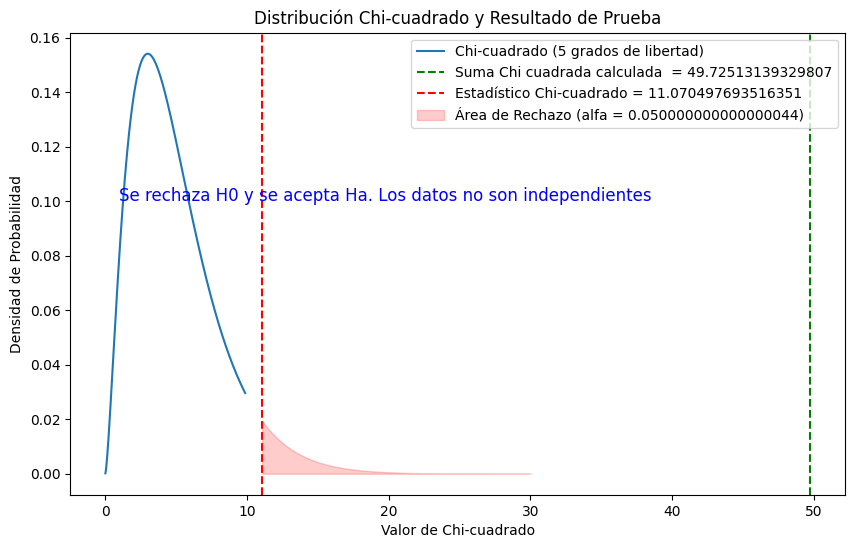

In [165]:
# Simular
datos = [0.23454, 0.34545, 0.43444, 0.23332, 0.23555,
         0.62345, 0.34888, 0.12345, 0.43454, 0.43334,
         0.34545, 0.10343, 0.15434, 0.98744, 0.01011]
datos

no_digitos = 5  #5  # Para saber cuales probabilidades utilizar mas adelante
print ("Número de dígits de los números (5, 4, 3). Por default 5: ", no_digitos)

# LA tabla:
tabla, suma_chi = f_frecuencias_manos_poker(datos, no_digitos)
# print(manos)
print(tabla)
print ("Suma calculada de Chi cuadrada: ", suma_chi)

# El contraste
confianza = 0.95
alfa = 1 - confianza

decision, valor_prueba_chi, gl = f_contraste(suma_chi, alfa, tabla)

print("valor de prueba chi:", valor_prueba_chi)
print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi, valor_prueba_chi, gl, alfa)







# Interpretación del caso

Pendiente

¿qu sucede si se mandan datos de tres dígitos?
¿qué sucedss si se mandas datos de 4 dígitos?
¿porqué nó considerar o si considerar las manos que no salgan?, Esto afecata a los grados de libertdas, y a las probabilidades predefinidas

# Otros datos

Son valores que estan entre 0.20000 y 0.30000.

0.22891, 0.25053, 0.2592, 0.20117, 0.2355, 0.27837, 0.22821, 0.23859, 0.20371, 0.20398, 0.22366, 0.20577, 0.25332, 0.20269, 0.28993, 0.23871, 0.24967, 0.23033, 0.23459, 0.24644, 0.20479, 0.22663, 0.25946, 0.28821, 0.21905, 0.20324, 0.27619, 0.29996, 0.27291, 0.27688, 0.229, 0.2889, 0.21601, 0.21689, 0.29968, 0.24317, 0.24969, 0.26983, 0.2676, 0.23266, 0.29265, 0.2178, 0.22853, 0.20069, 0.26602, 0.29808, 0.28863, 0.20441, 0.27957, 0.20698


Número de dígits de los números (5, 4, 3). Por default 5:  5
  Tipo de Mano  Frecuencia Oi   probs  Frecuencia Ei  C Chi_cuad
0       1-Nada             15  0.3024          15.12    0.000952
1     2-Un Par             25  0.5040          25.20    0.001587
2  3-Dos Pares              6  0.1080           5.40    0.066667
3     4-Tercia              4  0.0720           3.60    0.044444
Suma calculada de Chi cuadrada:  0.11365079365079367
valor de prueba chi: 7.814727903251179
Se acepta H0. Los datos son independientes


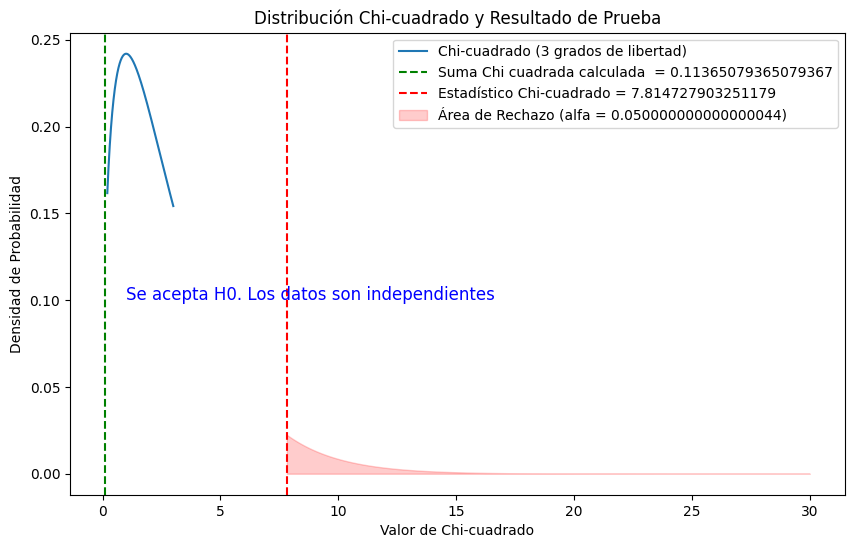

In [167]:
datos = [0.22891, 0.25053, 0.2592, 0.20117, 0.2355,
         0.27837, 0.22821, 0.23859, 0.20371, 0.20398,
         0.22366, 0.20577, 0.25332, 0.20269, 0.28993,
         0.23871, 0.24967, 0.23033, 0.23459, 0.24644,
         0.20479, 0.22663, 0.25946, 0.28821, 0.21905,
         0.20324, 0.27619, 0.29996, 0.27291, 0.27688,
         0.229, 0.2889, 0.21601, 0.21689, 0.29968,
         0.24317, 0.24969, 0.26983, 0.2676, 0.23266,
         0.29265, 0.2178, 0.22853, 0.20069, 0.26602,
         0.29808, 0.28863, 0.20441, 0.27957, 0.20698]



datos

no_digitos = 5  #5  # Para saber cuales probabilidades utilizar mas adelante
print ("Número de dígits de los números (5, 4, 3). Por default 5: ", no_digitos)

# LA tabla:
tabla, suma_chi = f_frecuencias_manos_poker(datos, no_digitos)
# print(manos)
print(tabla)
print ("Suma calculada de Chi cuadrada: ", suma_chi)

# El contraste
confianza = 0.95
alfa = 1 - confianza

decision, valor_prueba_chi, gl = f_contraste(suma_chi, alfa, tabla)

print("valor de prueba chi:", valor_prueba_chi)
print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi, valor_prueba_chi, gl, alfa)




# Otros datos

Se presume que los datos están en secuencia por lo que tienen un patrón. de 0.0001 en 0.0001.

Debe salir que no son independientes


Número de dígits de los números (5, 4, 3). Por default 5:  5
  Tipo de Mano  Frecuencia Oi   probs  Frecuencia Ei  C Chi_cuad
0       1-Nada             25  0.3024          15.12    6.455979
1     2-Un Par             23  0.5040          25.20    0.192063
2  3-Dos Pares              1  0.1080           5.40    3.585185
3     4-Tercia              1  0.0720           3.60    1.877778
Suma calculada de Chi cuadrada:  12.111005291005288
valor de prueba chi: 7.814727903251179
Se rechaza H0 y se acepta Ha. Los datos no son independientes


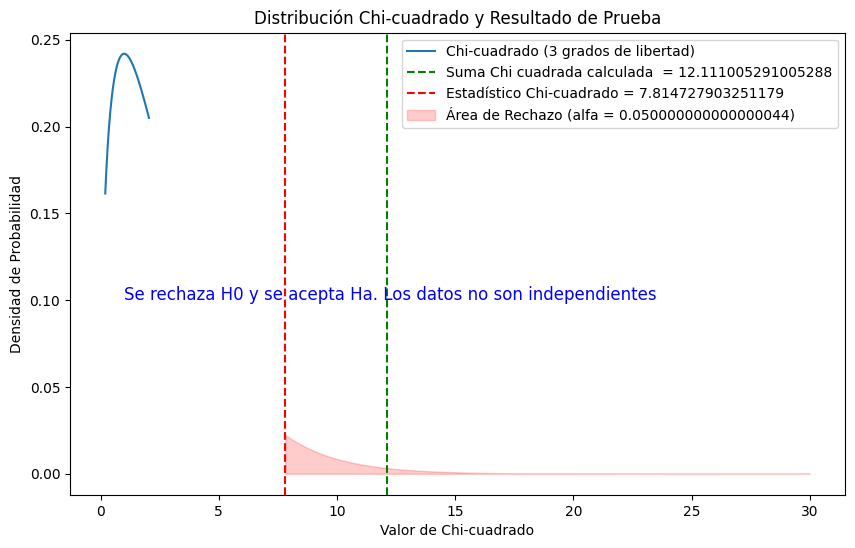

In [170]:
datos = [0.2, 0.2001, 0.2002, 0.2003, 0.2004,
         0.2005, 0.2006, 0.2007, 0.2008, 0.2009,
         0.201, 0.2011, 0.2012, 0.2013, 0.2014,
         0.2015, 0.2016, 0.2017, 0.2018, 0.2019,
         0.202, 0.2021, 0.2022, 0.2023, 0.2024,
         0.2025, 0.2026, 0.2027, 0.2028, 0.2029,
         0.203, 0.2031, 0.2032, 0.2033, 0.2034,
         0.2035, 0.2036, 0.2037, 0.2038, 0.2039, 0.204,
         0.2041, 0.2042, 0.2043, 0.2044, 0.2045, 0.2046,
         0.2047, 0.2048, 0.2049]

datos


no_digitos = 5  #5  # Para saber cuales probabilidades utilizar mas adelante
print ("Número de dígits de los números (5, 4, 3). Por default 5: ", no_digitos)

# LA tabla:
tabla, suma_chi = f_frecuencias_manos_poker(datos, no_digitos)
# print(manos)
print(tabla)
print ("Suma calculada de Chi cuadrada: ", suma_chi)

# El contraste
confianza = 0.95
alfa = 1 - confianza

decision, valor_prueba_chi, gl = f_contraste(suma_chi, alfa, tabla)

print("valor de prueba chi:", valor_prueba_chi)
print(decision)
# Visualizar
f_visualizar_chi_prueba_independencia(datos, suma_chi, valor_prueba_chi, gl, alfa)
